# Sckikit-learn ML 기본동작

1) 데이터 수집 & 준비

2) 데이터 전처리
    -  데이터 / 타겟 분리
    - 데이터 표준화 / 정규화
    - 타겟(라벨) 인코딩
    
3) 학습을 위한 데이터 준비
    - 데이터셋
        * 학습용 데이터셋 => 학습에 사용
        * 검증용 데이터셋 => 모델 생성 중에 사용
        * 테스트용 데이터셋 => 모델 완성 후 사용

4) 학습 모델 생성
    - 학습 방법 선정 및 모델 객체 생성
    - 학습 진행
        * 모델 파라미터 최적화 => 학습에 의해서 결정되는 파라미터
        * 최적의 모델 파라미터를 찾기위한 방법으로 => 최적화(optimizer)
        * 예) W 가중치, b 절편
    - 모델 평가
        * 성능 개션 => 하이퍼파라미터(모델마다 다름) => 모델 튜닝
        * 예) KNN => K, 학습 횟수, 학습크기(배치 사이즈), 규제 값들

5) 모델 테스트
    - 학습에 사용되지 않은 데이터
    - 새로운 데이터로 테스트 진행

In [2]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### [1] 데이터 준비

In [3]:
# 시간 : 점수
X=[2,4,6,8,10,12]
y=[40,50,60,70,80,90]

##### [2] 데이터 분포 분석 => EDA => 시각화

In [4]:
import matplotlib.pyplot as plt

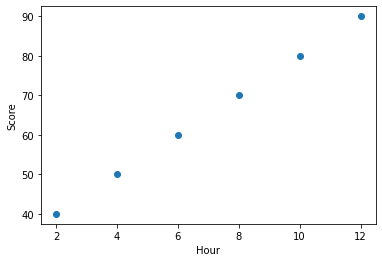

In [5]:
plt.scatter(X, y)
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

- 시간과 점수는 비례 관계이다.
- 선형의 데이터 분포
- 독립변수 => hour
- 종속변수 => score

##### [2.5] 학습에 사용되는 형태로 데이터 변환

In [11]:
import pandas as pd
df = pd.DataFrame([X, y]) # 리스트 안에 리스트 들어감
# df = pd.DataFrame({'Hour':X, 'Score':y}) # 딕셔너리로도 가능
print(df.shape)

(2, 6)


In [13]:
import numpy as np
arrX=np.array(X)
arrY=np.array(y)
print(arrX.shape, arrY.shape)

(6,) (6,)


In [14]:
# 1차원의 데이터를 -> 2차원으로
arrX=arrX.reshape(-1,1)
arrY=arrY.reshape(-1,1)
print(arrX.shape, arrY.shape)

(6, 1) (6, 1)


##### [3] 학습 방법 선택 및 모델 생성
    - 시간에 따른 점수 예측
    - 데이터 + 라벨 => 지도학습
    - 선형 데이터 분포 => 선형 모델을 적용

In [15]:
#  모델 객체 생성
model = LinearRegression()

# 학습 => 트레이니 데이터 사용
# fit()메서드 => 2차원 형태의 데이터여야 함.
model.fit(arrX, arrY)

# 모델 파라미터 => w 가중치, b 절편
print('w : ', model.coef_, 'b : ', model.intercept_)

w :  [[5.]] b :  [30.]


##### [4] 모델평가
    - 테스트(검증) 데이털 평가
    - score()
        * 분류 : 정답과 예측답의 맞춘 정도
            - 정확도
        * 회귀 : 정답과 예측답의 차이 오차(Error)
            - 손실함수(Loss/Cost Function) : MSE, MAE, RMSE가 낮을 수록 좋음
            - R2 계수 : 0 ~ 1 사이, 높을 수록 좋음.
            
        

In [16]:
# 회귀 => 결정계수 R^2 반환
model.score(arrX, arrY)

1.0

In [17]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 예측값 추출
predictY=model.predict(arrX)

MAE=mean_absolute_error(arrX, predictY)
MSE=mean_squared_error(arrY, predictY)

print(MAE, MSE)

58.0 8.414516322357459e-30
